# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [ ]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [ ]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [ ]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

In [ ]:
results = {'Time': x, 'Mass': mass}

In [ ]:
mass_df = pd.DataFrame(results)
mass_df

In [16]:
mass_df = pd.read_csv('mass_data/MassProfile_131222_S19-24_run1.csv')

<IPython.core.display.Javascript object>


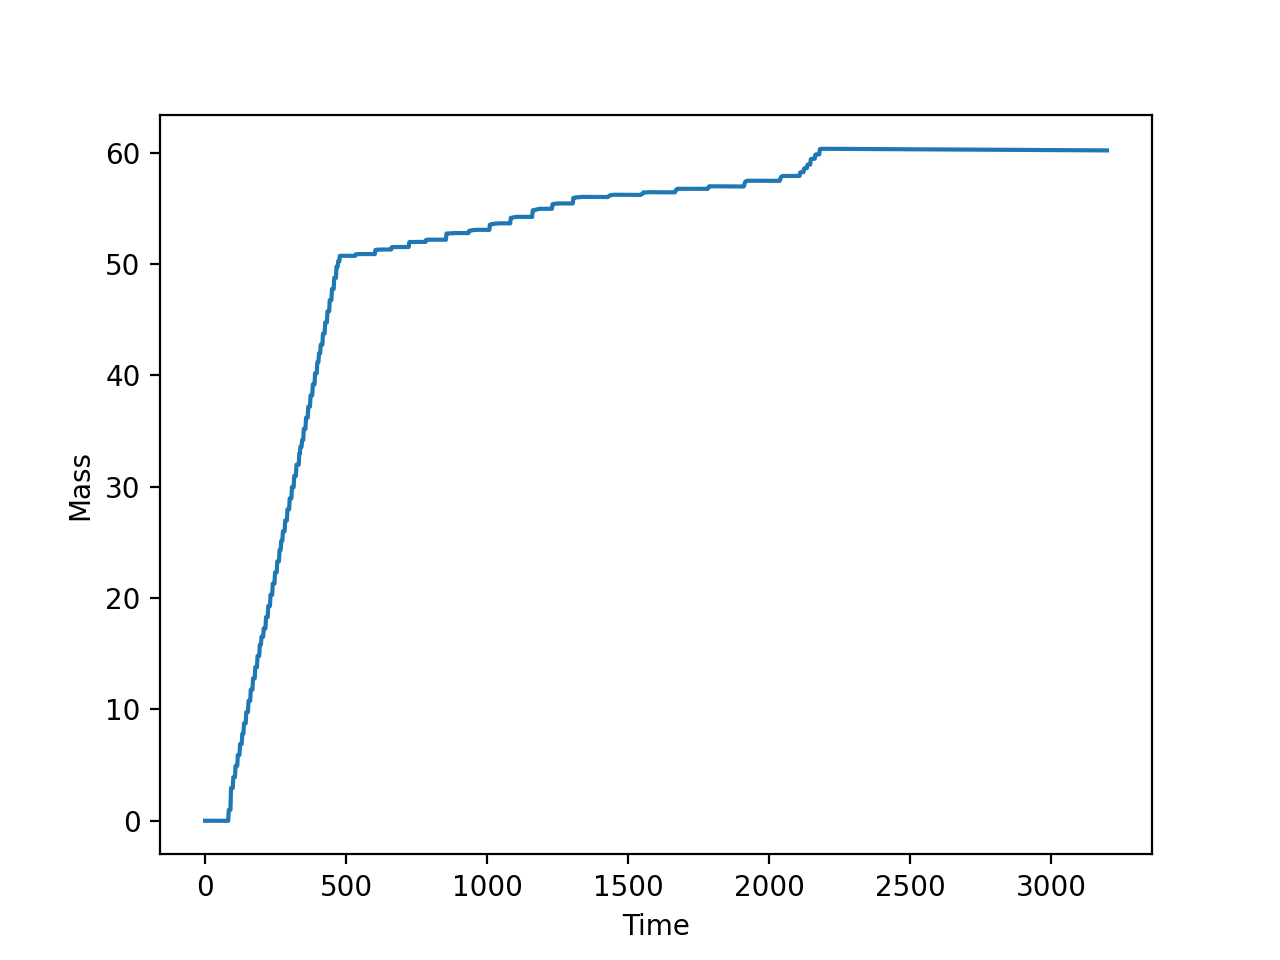

In [17]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [ ]:
mass_df.to_csv('mass_data/MassProfile_141222_S31-36_run2.csv')